<h2 align="center">Лабораторна робота №4</h2>
<h5 align="center"><i>Роботу виконала студентка групи ФІ-21, Денисенко Анастасія</i></h5>
<p><b>Тема роботи:</b> Генетичний і мурашиний алгоритми розв’язання задачі комівояжера</p>
<p><b>Мета роботи:</b> Опанувати принципи роботи мурашиного й генетичного для знаходження розв’язку задачі комівояжера. Розробити відповідне програмне забезпечення знаходження оптимальних розв’язків наведених у роботі задач.</p>

## Завдання до лабораторної роботи

1. Познайомитись з методами розв'язування кожної з поставлених задач комбінаторної оптимізації у базовому формулюванні.
2. Обрати середовище реалізації методів розв'язання задачі комівояжера, а також мову програмування для реалізації алгоритмів.
3. Написати програмний застосунок для генерування тестових даних для описаних у роботі задач. Тестовими даними можуть бути точки, які знаходяться на колі. У такому разі чітко можна провести порівняльний аналіз отриманого результату і точного результату відстані, яка дорівнює сумі довжин відразків, що попарно з'єднують точки на колі.
4. Взяти кількість вершин (точок) 30; 50; 100 та 200. Для кожного набору точок показати роботу кожного з двох алгоритмів, на які акцентована лабораторна робота (генетичний і мурашиний алгоритми). Підібрати параметри кожного з алгоритмів самостійно.
5. Взяти 2 будь-яких датасети з ресурсу: https://www.math.uwaterloo.ca/tsp/vlsi/index.html
6. Продемонструвати отримані результати моделювання. Показати мультиплікативно процес пошуку оптимальних або субоптимальних розв'язків поставлених задач.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from genetic import *
from ants import *
from IPython.display import clear_output

In [2]:
class Travelling_salesman:
    
    def __init__(self, nums, R):
        self.nums = nums
        self.R = R
        self.cities = self.generate_points()
        self.min_possible_route = self.route(self.cities)
        self.distance = self.distances()
        
    def generate_points(self):
        res = []
        for i in range(self.nums):
            theta = 2 * np.pi * i/self.nums
            x = self.R * np.cos(theta)
            y = self.R * np.sin(theta)
            res.append([x, y])
        return np.array(res)
        
    def find_distance(self, x0, y0, x1, y1):
        return ((x1 - x0)**2 + (y1 - y0)**2)**(1/2)
        
    def route(self, cities):
        res = 0
        for i in range(len(cities)-1):
            res += self.find_distance(cities[i][0], cities[i][1], cities[i+1][0], cities[i+1][1])
        return res

    def get_route(self, indexes):
        res = []
        for i in range(len(indexes)):
            res.append(self.cities[indexes[i]])
        return res

    def distances(self):
        d = [[0 for i in range(self.nums)] for i in range(self.nums)]
        for i in range(self.nums):
            for j in range(self.nums):
                if i != j:
                    d[i][j] = self.find_distance(self.cities[i][0], self.cities[i][1], self.cities[j][0], self.cities[j][1]) 
        return d

## Для 30 точок:

In [15]:
salesman30 = Travelling_salesman(30, 4)

### Для генетичного:

In [16]:
g30 = Genetic_optimization(salesman30, 100, 8, 0.4, 30)

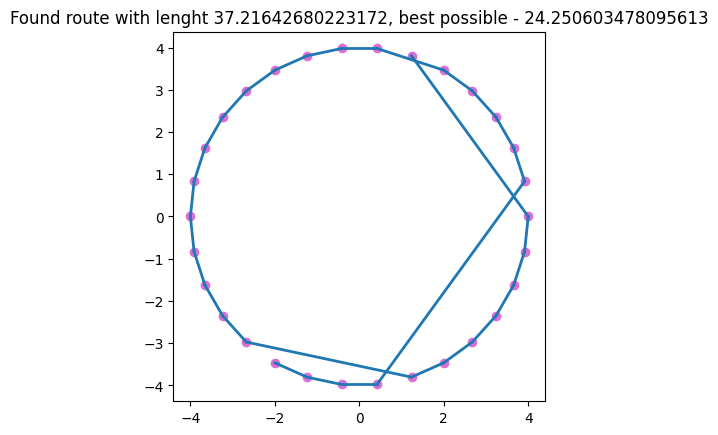

In [17]:
g30.plot_best()

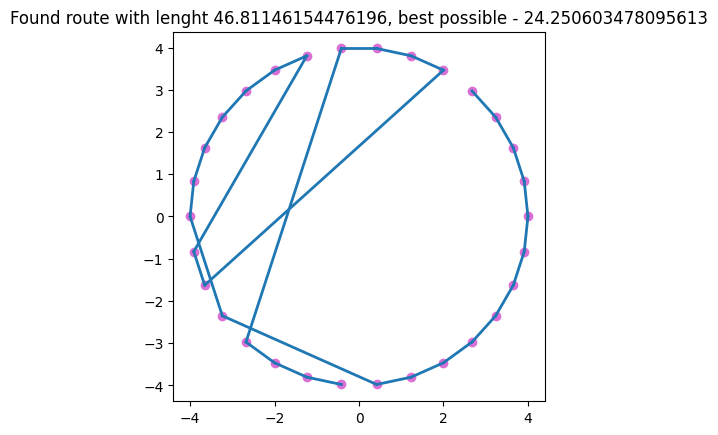

In [18]:
g30.plot_dynamic()

### Для мурах:

In [17]:
an30 = Ants(salesman30, size_pop = 40, num_iter = 40, alpha = 0.4, beta = 1, q = 100, rho = 0.9)

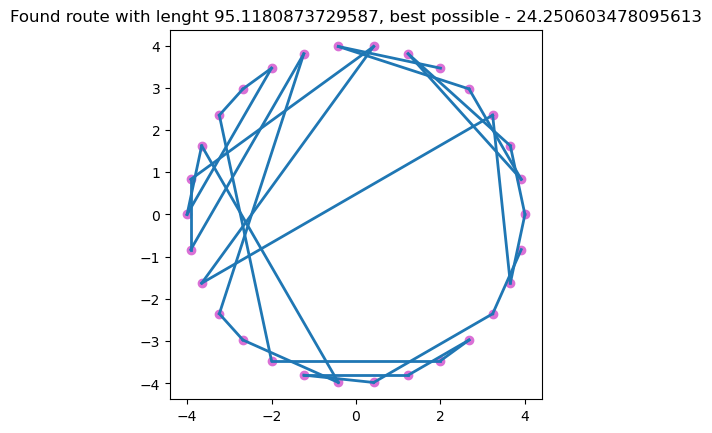

In [19]:
an30.plot_best()

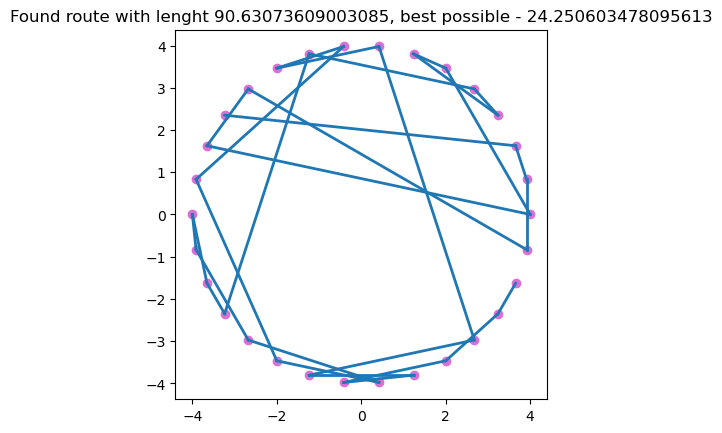

In [20]:
an30.plot_dynamic()

## Для 50 точок:

In [5]:
salesman50 = Travelling_salesman(50, 6)

### Для генетичного:

In [7]:
g50 = Genetic_optimization(salesman50, 100, 8, 0.4, 30)

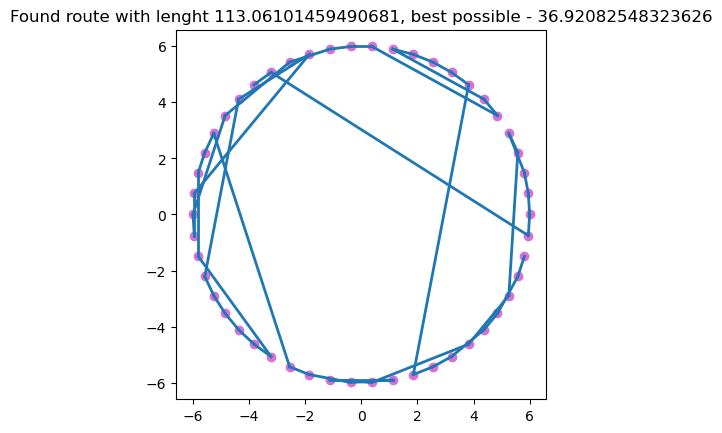

In [9]:
g50.plot_best()

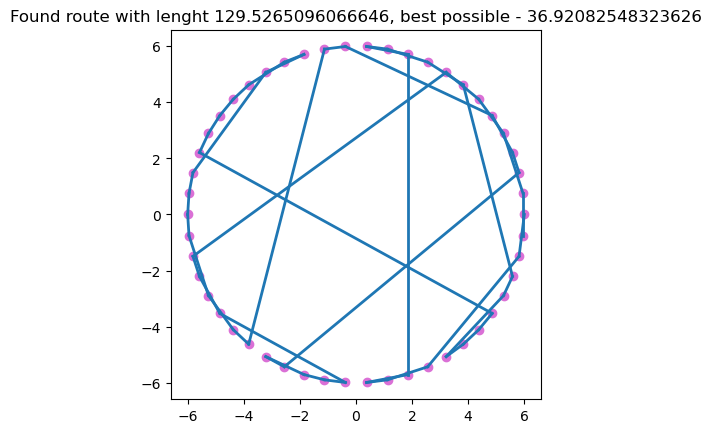

In [11]:
g50.plot_dynamic()

### Для мурах:

In [34]:
an50 = Ants(salesman50, size_pop = 40, num_iter = 40, alpha = 0.4, beta = 1, q = 100, rho = 0.9)

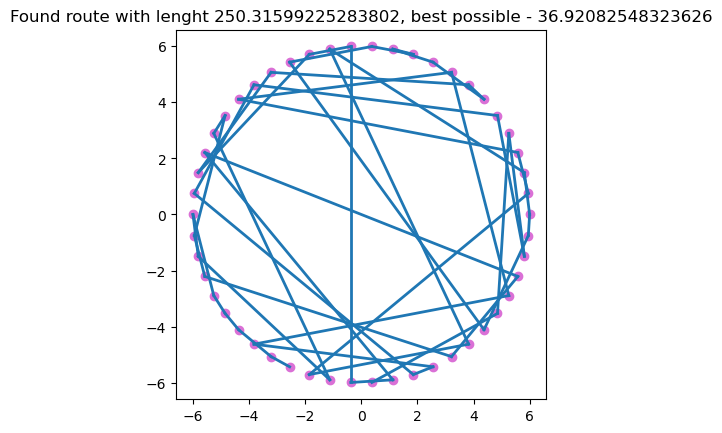

In [36]:
an50.plot_best()

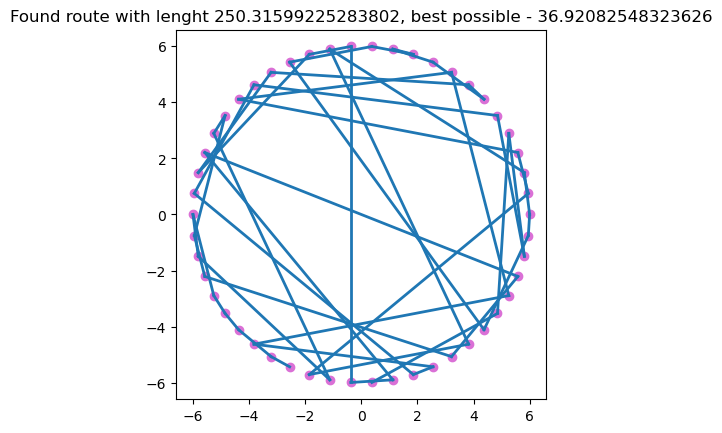

In [37]:
an50.plot_dynamic()

## Для 100 точок:

In [39]:
salesman100 = Travelling_salesman(100, 15)

### Для генетичного:

In [41]:
g100 = Genetic_optimization(salesman100, 100, 8, 0.4, 30)

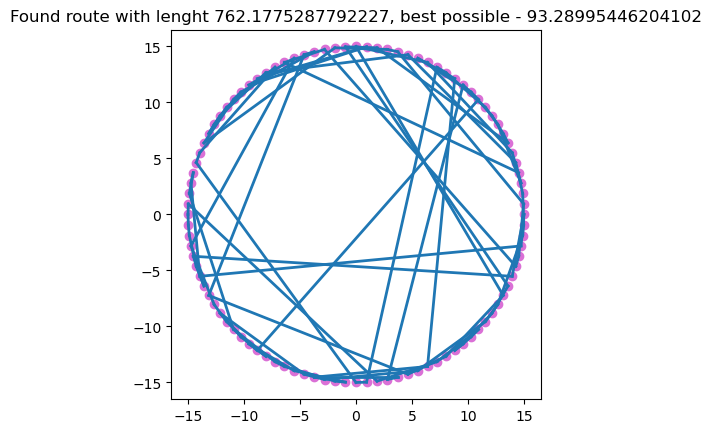

In [42]:
g100.plot_best()

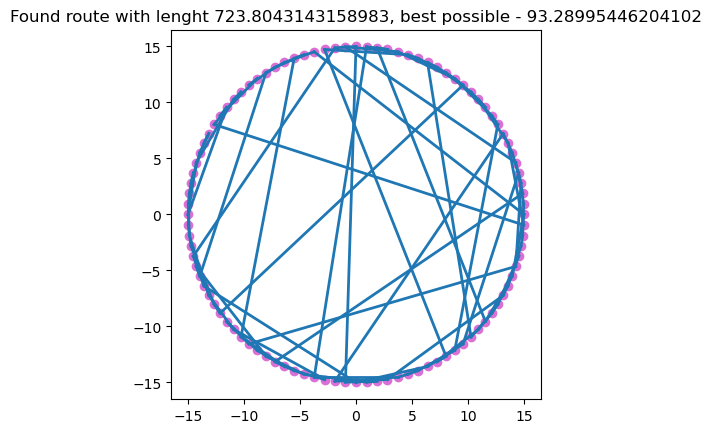

In [43]:
g100.plot_dynamic()

### Для мурах:

In [45]:
an100 = Ants(salesman100, size_pop = 40, num_iter = 40, alpha = 0.4, beta = 1, q = 100, rho = 0.9)

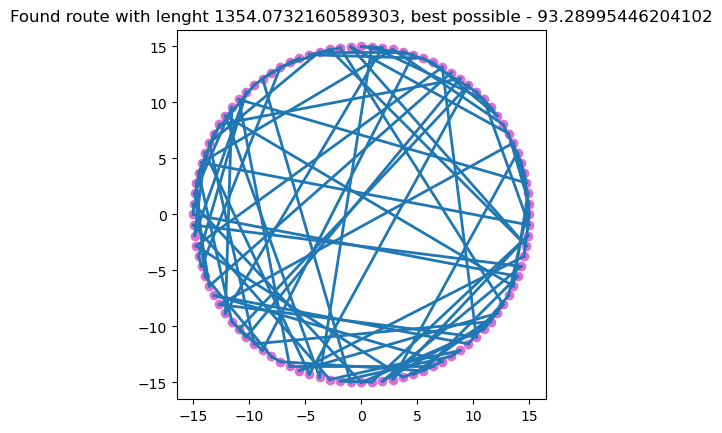

In [46]:
an100.plot_best()

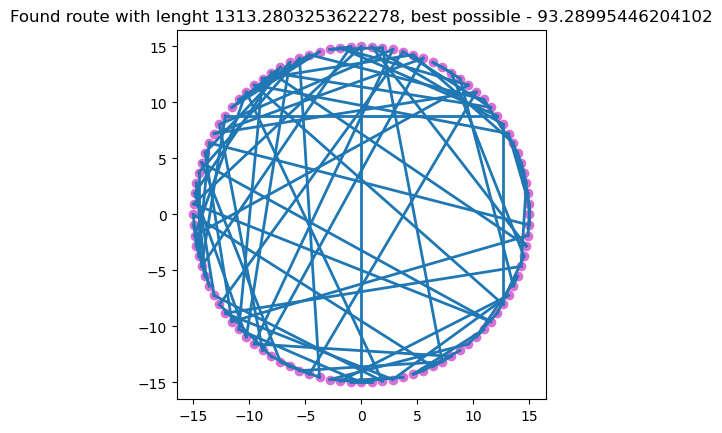

In [47]:
an100.plot_dynamic()

## Для 200 точок:

In [49]:
salesman200 = Travelling_salesman(200, 40)

### Для генетичного:

In [51]:
g200 = Genetic_optimization(salesman200, 100, 8, 0.4, 30)

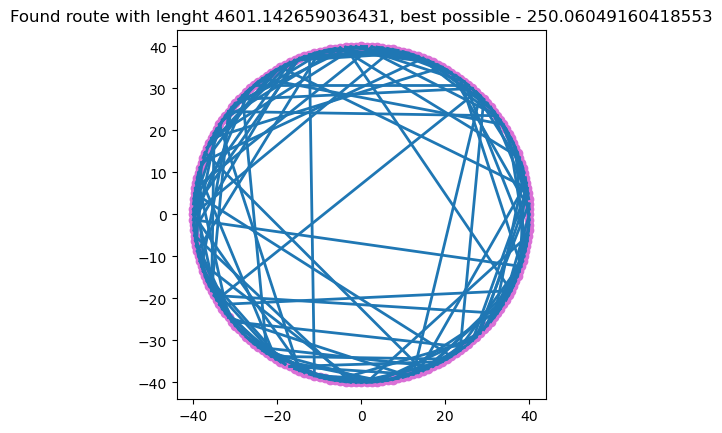

In [52]:
g200.plot_best()

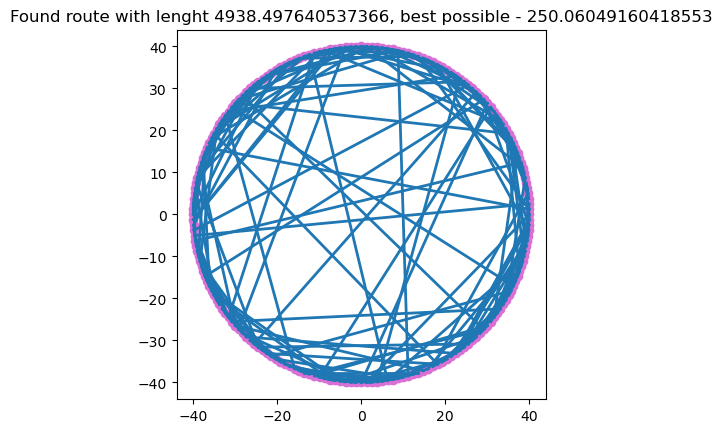

In [53]:
g200.plot_dynamic()

### Для мурах:

In [59]:
an200 = Ants(salesman200, size_pop = 10, num_iter = 20, alpha = 0.4, beta = 1, q = 100, rho = 0.9)

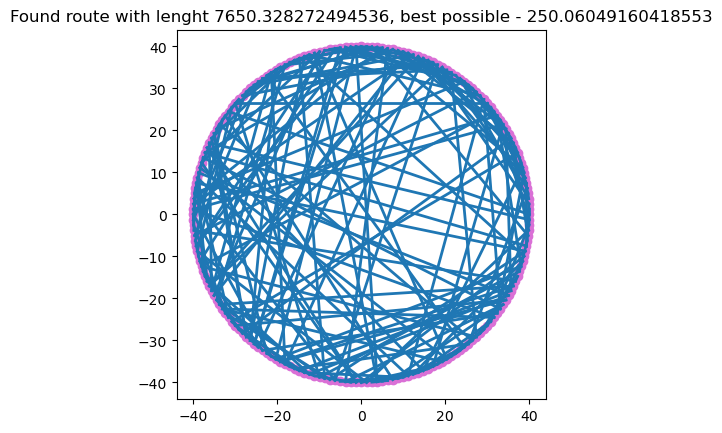

In [61]:
an200.plot_best()

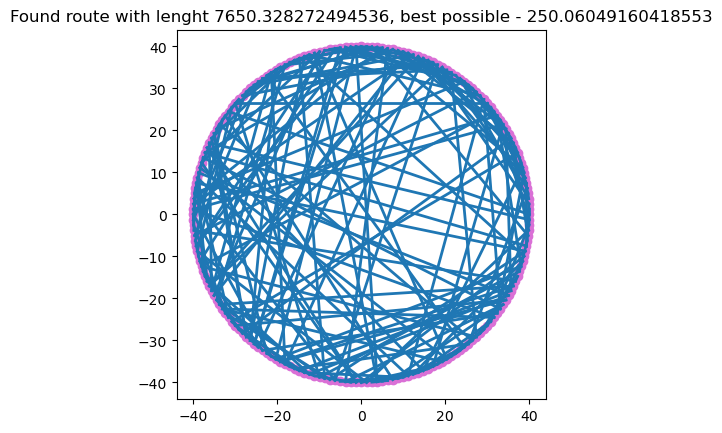

In [62]:
an200.plot_dynamic()